In [85]:
using LaTeXStrings
using Random: seed!
using Plots
using LinearAlgebra
using MIRTjim: jim
if true
    default(markersize=7, markerstrokecolor=:auto)
    fnt = font("DejaVu Sans", 15) # larger default font
    default(guidefont=fnt, xtickfont=fnt, ytickfont=fnt, legendfont=fnt)
end

In [137]:
#Problem 1
n = rand(4:7)
a = randn(n+1) # random vector of polynomial coefficients (a_0,a_1,...,a_n)
b = reverse(a) # reverse the coefficient order
# companion matrix maker:
compan = c-> [-transpose(reverse(c)); [I zeros(length(c)-1)]]
A = compan(a[1:end-1] / a[end])
B = compan(b[1:end-1] / b[end])
[eigvals(A) eigvals(B) 1 ./ eigvals(B)] # study the columns of this array

4×3 Matrix{ComplexF64}:
 -27.2919+0.0im        -0.912261+0.0im      -1.09618-0.0im
 -1.09618+0.0im       -0.0366409+0.0im      -27.2919-0.0im
 0.477123-0.394317im     1.24532-1.02919im  0.477123+0.394317im
 0.477123+0.394317im     1.24532+1.02919im  0.477123-0.394317im

In [135]:
#problem2
using FFTW
a = fft([1,1])

2-element Vector{ComplexF64}:
 2.0 + 0.0im
 0.0 + 0.0im

In [82]:
#Problem4 
"""
lr_schatten(Y, reg::Real)
Compute the regularized low−rank matrix approximation as the minimizer over `X`
of `1/2 \\|Y − X\\|^2 + reg R(x)`
where `R(X)` is the Schatten p−norm of `X` raised to the pth power, for `p=1/2`,
i.e., `R(X) = \\sum_k (\\sigma_k(X))^{1/2}`
In:
− `Y` : `M × N` matrix
− `reg` regularization parameter
Out:
− `Xh` : `M × N` solution to above minimization problem
"""
function lr_schatten(Y, reg::Real)
    U, s, V = svd(Y)
    xhat = shrink_p_1_2(s, reg)
    Xh = U * Diagonal(xhat) * V'
    return Xh
end
    
function shrink_p_1_2(v, reg::Real)
    m  = size(v,1)
    xhat = zeros(m)
    compute_xhat = (v) -> 4 / 3. * v * cos( 1 ./3 * acos(-(3^(3/2)*reg) / (4*v^(3/2))))^2
    compare_result = v .> 3/2. * reg^(2/3.)
    xhat[compare_result] = compute_xhat.(v[compare_result])
    return xhat
end 

shrink_p_1_2 (generic function with 1 method)

In [80]:
Y=[1 0 0;0 1 0;0 0 1]
U,s,V = svd(Y)
s
print(size(s,1))
reg=0.5
xh=lr_schatten(Y,reg)

3ahelloshrink_p_1shrink_p_1_2b

3×3 Matrix{Float64}:
 0.701516  0.0       0.0
 0.0       0.701516  0.0
 0.0       0.0       0.701516

(l2reg, nrmse(Xr)) = (8.0, 14.127626370282472)
(l2reg, nrmse(Xr)) = (8.5, 11.965607253788333)
(l2reg, nrmse(Xr)) = (9.0, 8.520989739855205)
(l2reg, nrmse(Xr)) = (9.5, 7.088100355507286)
(l2reg, nrmse(Xr)) = (10.0, 7.105809429261925)
(l2reg, nrmse(Xr)) = (10.5, 7.228156064437637)
(l2reg, nrmse(Xr)) = (11.0, 7.615504690985911)
(l2reg, nrmse(Xr)) = (11.5, 14.548670950392834)
(l2reg, nrmse(Xr)) = (12.0, 14.989677301080654)
nrmse(Xs) = 7.102365553759247


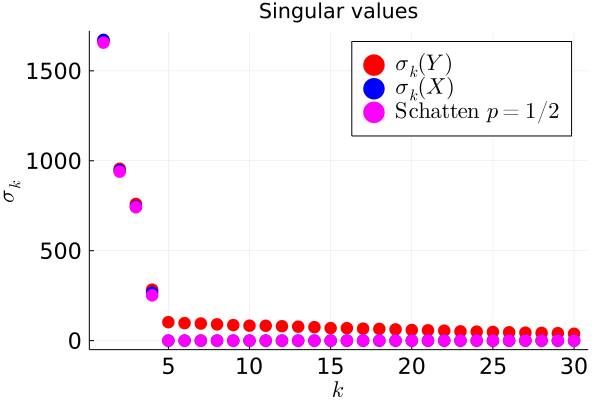

In [88]:
tmp = [
    zeros(1,20);
    0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0;
    0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0;
    0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0;
    0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0;
    zeros(1,20)
]';

X = 80 * kron(tmp, ones(5,5));
# Data Y is X + noise
seed!(0)
Y = X + 7 * randn(size(X))
nrmse = (Xh) -> norm(Xh - X) / norm(X) * 100
rmax = minimum(size(X))


# try different regularization parameters
for l2reg in 8:0.5:12
    Xr = lr_schatten(Y, 2^l2reg)
    @show l2reg, nrmse(Xr)
end

# Schatten LR with β=1000
β = 1000
Xs = lr_schatten(Y, β)
@show nrmse(Xs)

jim(Xs,
    xlabel="NRMSE = $(round(nrmse(Xs), digits=1)) %")
title!("Schatten LR image with p=1/2 and β = $β")

#savefig("hsj68im.pdf")

plot(xlabel=L"k", ylabel=L"\sigma_k", title="Singular values")
scatter!(1:rmax, svdvals(Y), color=:red, label=L"\sigma_k(Y)")
scatter!(1:rmax, svdvals(X), color=:blue, label=L"\sigma_k(X)")
scatter!(1:rmax, svdvals(Xs), color=:magenta, label=L"\mathrm{Schatten }\ p=1/2")

#savefig("hsj68svd.pdf")


In [10]:
A = Diagonal([1,1])

2×2 Diagonal{Int64, Vector{Int64}}:
 1  ⋅
 ⋅  1

In [19]:
Y
size(Y)

(100, 30)

In [1]:
#Problem 3 
A = [-1 1 0 0 0
    0 -1 1 0 0
    0 0 -1 1 0
    0 0 0 -1 1
    1 0 0 0 -1]

5×5 Matrix{Int64}:
 -1   1   0   0   0
  0  -1   1   0   0
  0   0  -1   1   0
  0   0   0  -1   1
  1   0   0   0  -1

In [4]:
eigvals(A)

5-element Vector{ComplexF64}:
    -1.8090169943749475 - 0.5877852522924734im
    -1.8090169943749475 + 0.5877852522924734im
    -0.6909830056250533 - 0.9510565162951539im
    -0.6909830056250533 + 0.9510565162951539im
 3.0524121069554347e-18 + 0.0im

In [5]:
B = [ -1 1
    1 -1]
eigvals(B)

2-element Vector{Float64}:
 -2.0
  0.0

In [6]:
C = [-1 1 0 0 
     0 -1 1 0
     0 0 -1 1
     1 0 0 -1]
eigvals(C)

4-element Vector{ComplexF64}:
     -2.0000000000000013 + 0.0im
     -1.0000000000000002 - 1.0000000000000002im
     -1.0000000000000002 + 1.0000000000000002im
 -1.8732355726879183e-16 + 0.0im

In [13]:
for i in 0:3
    @show eigvals_expression = -1 + exp(i *2 * pi * im /4)
end

eigvals_expression = -1 + exp((i * 2 * pi * im) / 4) = 0.0 + 0.0im
eigvals_expression = -1 + exp((i * 2 * pi * im) / 4) = -0.9999999999999999 + 1.0im
eigvals_expression = -1 + exp((i * 2 * pi * im) / 4) = -2.0 + 1.2246467991473532e-16im
eigvals_expression = -1 + exp((i * 2 * pi * im) / 4) = -1.0000000000000002 - 1.0im


In [12]:
pi

π = 3.1415926535897...

In [33]:
function compute_nuclear_norm(C, n)
    norm = 0
    for i in 0:n-1
        eigvals_expression = +2 - exp(i *2 * pi * im /n) - (exp(i *2 * pi * im /n))^(n-1)
        norm = norm + sqrt(eigvals_expression)
    end 
    return norm
end 


compute_nuclear_norm (generic function with 1 method)

compute_nuclear_norm(C, 4)

In [34]:
compute_nuclear_norm(C, 4)

4.82842712474619 - 1.2246467991473532e-16im

In [35]:
sum(svdvals(C))

4.82842712474619

In [41]:
Matrix(I, 7,4)

7×4 Matrix{Bool}:
 1  0  0  0
 0  1  0  0
 0  0  1  0
 0  0  0  1
 0  0  0  0
 0  0  0  0
 0  0  0  0

In [129]:
#Problem 5
"""
haveCommonRoot = common_root(a, b ; atol)
Determine if the polynomials described by input coefficient vectors `a`
and `b` share a common root, to within an absolute tolerance parameter `atol`.
Assume leading coefficients `a[end]` and `b[end]` are nonzero.
In:
− `a` : vector of length `m + 1` with `a[m+1] != 0` and `m   0`
defining a degree `m` polynomial of the form:
`p(z) = a[m+1] z^m + a[m] z^(m − 1) + ... + a[2] z + a[1]`
− `b` : vector of length `n + 1` with `b[n+1] != 0` and `n   0`
defining a degree `n` polynomial of the form:
`q(z) = b[n+1] z^n + b[n] z^(n − 1) + ... + b[1] z + b[1]`
Option:
− `atol::Real` absolute tolerance for calling `isapprox`
Out:
− `haveCommonRoot` = `true` when `p` and `q` share a common root, else `false`
"""
function common_root(a::AbstractVector, b::AbstractVector ; atol::Real=1e-6)
    m = size(a,1)
    n = size(b,1)
    if (m == 1 || n == 1)
        return false
    end
    # companion matrix maker:
    compan = c-> [-transpose(reverse(c)); [I zeros(length(c)-1)]]
    A = compan(a[1:end-1] / a[end])
    B = compan(b[1:end-1] / b[end])
    
    kron_A_B = kron(A, I(n-1)) + kron(I(m-1), -B)
    return isapprox(det(kron_A_B), 0.0,atol = atol)
end

common_root

In [130]:
a = [1,2,3]
b = [1,2]

common_root(a,b)

false

In [110]:
a = [1,2,3]
b = [2,3,4]

common_root(a,b)

false